# Titanic

In [102]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

df = pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [103]:
# create dummy column
df = pd.concat([df, pd.get_dummies(df.Sex, drop_first = True)], axis = 1)
df.drop(["Sex"], axis = 1, inplace = True)

# create family size
df["Family_Size"] = df["SibSp"] + df["Parch"]

# create Fare per person
df['Fare_Per_Person'] = df['Fare']/(df['Family_Size'] + 1)

# create dummy column
df = pd.concat([df, pd.get_dummies(df.Embarked, drop_first = True)], axis = 1)
df.drop(["Embarked"], axis = 1, inplace = True)

# drop cabin
df.drop(["Cabin"], axis = 1, inplace = True)

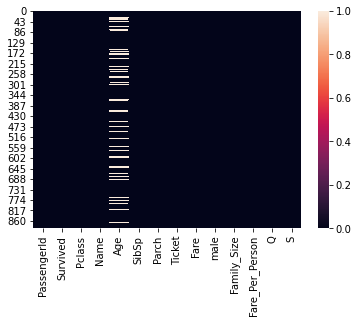

In [104]:
sns.heatmap(df.isnull());

In [105]:
# fill age NAs with mean
values = {'Age': df.Age.mean()}
df.fillna(value = values, inplace = True)

In [106]:
df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,male,Family_Size,Fare_Per_Person,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,1,1,3.62500,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,0,1,35.64165,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0,0,7.92500,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,0,1,26.55000,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,1,0,8.05000,0,1
